In [54]:
#confusion matrix, accuracy, recall
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

path='/kaggle/input/breastcancerwisconsindata/data.csv'
file= pd.read_csv(path)

file=file.dropna(how='all',axis=1)

In [55]:
file.isnull().count()
y=file.pop('diagnosis')
file.drop(labels='id',axis=1,inplace=True,errors='ignore')

In [56]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [57]:
#đổi m,b trong y-> 1,0
import numpy as np
y_np=y.to_numpy()
np.place(y_np,y_np=='M',1)
np.place(y_np,y_np=='B',0)
y=pd.Series(y_np)
y[0:5]

0    1
1    1
2    1
3    1
4    1
dtype: object

Train:
 0    249
1    149
dtype: int64 
Test: 0    108
1     63
dtype: int64


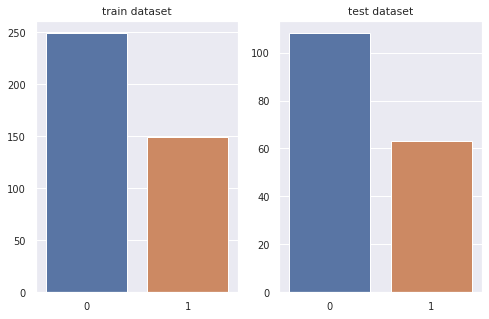

In [58]:
X_train,X_test,y_train,y_test=train_test_split(file,y,test_size=0.3,random_state=0)
print('Train:\n',y_train.value_counts(),'\nTest:',y_test.value_counts())


def count(y):   
    return y.value_counts()

def bias_barplot(y_train, y_test):
    plt.figure(figsize=(8,5))
    
    plt.subplot(1,2,1)
    plt.title("train dataset")
    ax=sns.barplot( x=[0,1],y=[np.count_nonzero(y_train==0),np.count_nonzero(y_train==1)])
    plt.subplot(1,2,2);
    plt.title("test dataset")
    ax=sns.barplot( x=[0,1],y=[np.count_nonzero(y_test==0),np.count_nonzero(y_test==1)])
    plt.show()


bias_barplot(y_train, y_test)

In [59]:
import math
def sigmoid(x):
    return round(1/(1+np.exp(-x)),6)

def predicts(w,X):
  p=[]
  for record in X:
    temp=np.dot(record, w[0:X.shape[1]].T)
    temp+=w[-1]
    p.append(sigmoid(temp))
  return p  

def evaluation(p,y):
    matrix=np.zeros((2,2))
    for i in range(len(y)):
        matrix[ round(p[i]) ] [y[i]]+=1
    #True+, True-, False+, False-    
    tp,tn,fp,fn=matrix[1,1], matrix[0,0], matrix[1,0], matrix[0,1]
    accuracy=round( (tp+tn)/ (tp+tn+fn+fp),5)
    precision= round(tp/ (tp+fp),5)
    recall= round(tp/(tp+fn),5)
    f_score= round(2*precision*recall/ (precision+recall),5)
    return accuracy,tp,tn,fp,fn, precision, recall, f_score
   

def Loss_cal(p,y,im=1):
    Loss=0 
    for i in range(len(y)):
          print(y[i],p[i])
          Loss += im * y[i] * math.log( p[i] ) +  (1 - y[i]) * math.log( 1 - p[i])
    return round(Loss/len(y),6) 

def Visualized_matrix(result):
  #plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative']) 
  ax.set(xlabel='True Value',ylabel='Predict value') 

def the_result(result):
    print("accuracy:",result[0],"\nprecison:",result[5],"\nrecall:",result[6],"\nf-score:",result[7])



In [60]:

y_train=y_train.astype(int)
y_train[0:5]

478    0
303    0
155    0
186    1
101    0
dtype: int64

accuracy: 0.92398 
precison: 0.98077 
recall: 0.80952 
f-score: 0.88695
________________________________________
accuracy: 0.95322 
precison: 0.98246 
recall: 0.88889 
f-score: 0.93334
________________________________________
accuracy: 0.95322 
precison: 0.9661 
recall: 0.90476 
f-score: 0.93442
________________________________________


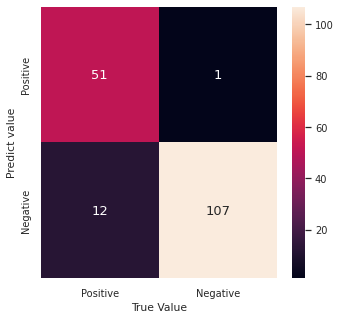

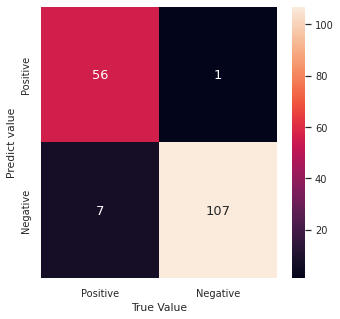

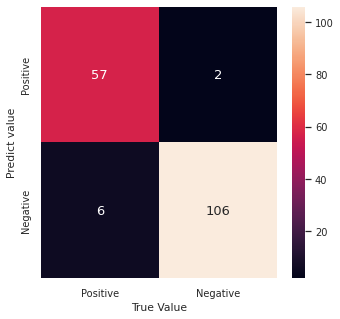

In [72]:
try:
    combine=[X_train,X_test,y_train,y_test]
    X_train,X_test,y_train,y_test=[dts.to_numpy() for dts in combine]
except:
    pass
from sklearn.svm import SVC
C_list=[1,3,10]

for i,c in enumerate(C_list):
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,i+1)
    model_svm = SVC(C= c)
    model_svm.fit(X_train, y_train)
    prediction = model_svm.predict(X_test)
    result = evaluation(prediction, y_test)
    the_result(result)
    print(40*'_')
    Visualized_matrix(result)


accuracy: 0.95906 
precison: 0.92424 
recall: 0.96825 
f-score: 0.94573
________________________________________
accuracy: 0.95906 
precison: 0.91176 
recall: 0.98413 
f-score: 0.94656
________________________________________
accuracy: 0.95322 
precison: 0.91045 
recall: 0.96825 
f-score: 0.93846
________________________________________


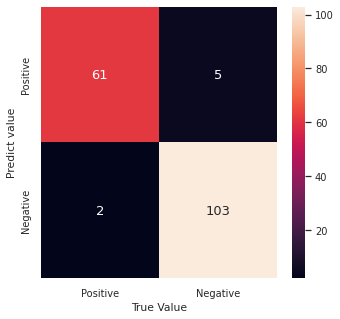

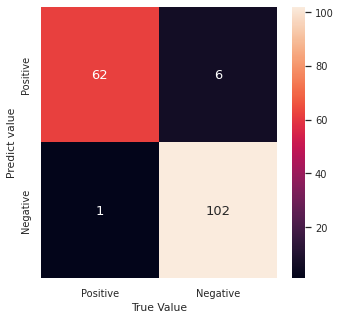

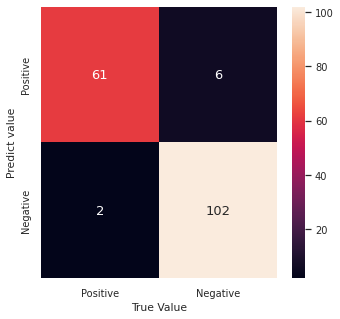

In [73]:
#linear

for i,c in enumerate(C_list):
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,i+1)
    model_svm = SVC(C= c, kernel='linear')
    model_svm.fit(X_train, y_train)
    prediction = model_svm.predict(X_test)
    result = evaluation(prediction, y_test)
    the_result(result)
    print(40*'_')
    Visualized_matrix(result)